In [15]:
import numpy as np
import pandas as pd 
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_df=pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')
test_df=pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test.csv')


In [17]:
train_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [18]:
Y_train=train_df['label']
X_train=train_df.drop('label',axis=1)

Y_test=test_df['label']
X_test=test_df.drop('label',axis=1)


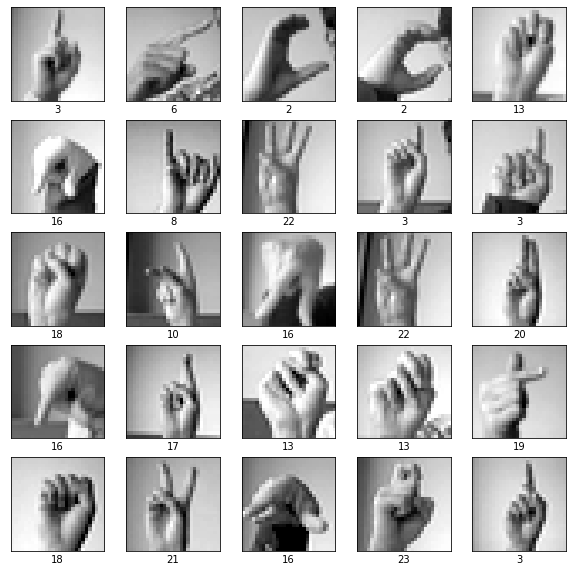

In [19]:
X_train = X_train.values.reshape(-1,28,28)
X_test = X_test.values.reshape(-1,28,28)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
    plt.xlabel(Y_train[i])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Frequency of each label')

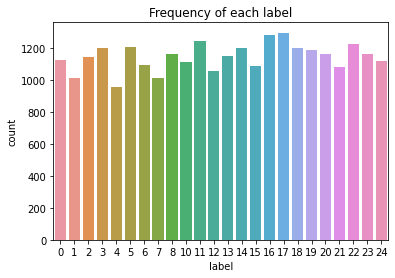

In [20]:
sns.countplot(Y_train)
plt.title("Frequency of each label")

Reshaping, Normalisation and Encoding

In [21]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [22]:
X_train = X_train/255.0
X_test = X_test/255.0

In [23]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
Y_train = label_binrizer.fit_transform(Y_train)
Y_test = label_binrizer.fit_transform(Y_test)

In [24]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


In [25]:
print(Y_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [26]:
model=Sequential()
model.add(Conv2D(filters = 128, kernel_size = (4,4), padding = "Same", activation = "relu", input_shape = (28,28,1)))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (4,4), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 16, kernel_size = (4,4), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(units = 512, activation = "relu"))

model.add(Dropout(0.5))

model.add(Dense(units =24, activation = "softmax"))

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 128)       2176      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        131136    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          32800     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 16)         

In [27]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/10
215/215 - 50s - loss: 2.1601 - accuracy: 0.3056 - val_loss: 1.0592 - val_accuracy: 0.6237
Epoch 2/10
215/215 - 48s - loss: 0.5268 - accuracy: 0.8189 - val_loss: 0.5585 - val_accuracy: 0.8168
Epoch 3/10
215/215 - 49s - loss: 0.1405 - accuracy: 0.9551 - val_loss: 0.4253 - val_accuracy: 0.8756
Epoch 4/10
215/215 - 48s - loss: 0.0530 - accuracy: 0.9846 - val_loss: 0.5596 - val_accuracy: 0.8574
Epoch 5/10
215/215 - 49s - loss: 0.0294 - accuracy: 0.9921 - val_loss: 0.4112 - val_accuracy: 0.8996
Epoch 6/10
215/215 - 48s - loss: 0.0243 - accuracy: 0.9925 - val_loss: 0.4545 - val_accuracy: 0.8981
Epoch 7/10
215/215 - 48s - loss: 0.0121 - accuracy: 0.9965 - val_loss: 0.6553 - val_accuracy: 0.8755
Epoch 8/10
215/215 - 49s - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.6399 - val_accuracy: 0.8830
Epoch 9/10
215/215 - 48s - loss: 0.0167 - accuracy: 0.9956 - val_loss: 0.3617 - val_accuracy: 0.9108
Epoch 10/10
215/215 - 49s - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.4142 - val_accura

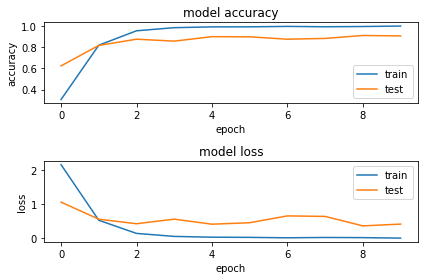

In [28]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
